## EDA of Pareto results from the Susquehanna model

In [168]:
import sys
import os
import pandas as pd
from ema_workbench.analysis.parcoords import ParallelAxes, get_limits
from ema_workbench.em_framework.optimization import HypervolumeMetric
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]
sys.path.append('..')
from itertools import chain
import numpy as np

from platypus import Solution, Problem, Hypervolume


import problem_formulation

## Loading datasets

In [235]:
pareto_sets = {}
pareto_sets_test = {}

ethical_formulations = [problem_formulation.OriginalProblem, 
                        problem_formulation.EgalitarianProblem, 
                        problem_formulation.UtilitarianProblem]

for entry in ethical_formulations:
    solutions = []
    output = 'output_farley'
    name = entry.__name__
    output_dir = f"../{output}/{name}/"
    for filename in os.listdir(output_dir):
        if filename.endswith('solution.csv'):
            df_temp = pd.read_csv(f"{output_dir}{filename}", header=0)
            solutions.append(df_temp.values.tolist())
            pareto_sets_test[name] = list(chain.from_iterable(solutions))
            pareto_sets[name] = df_temp

# index = ['hydropower', 'atomic power plant', ' baltimore', 'chester', 'environment', 'recreation']
# new_df_list = []
# var_holder = {}

# for name in pareto_sets_test:
#     for sol in solutions:
#         problem = entry.__name__
#         var_holder['new_df_' + str(name)] = pd.DataFrame(columns=index, index=sol)
#     locals().update(var_holder)

../output_farley/OriginalProblem/10_solution.csv
../output_farley/OriginalProblem/50_solution.csv
../output_farley/OriginalProblem/20_solution.csv
../output_farley/OriginalProblem/60_solution.csv
../output_farley/OriginalProblem/100_solution.csv
../output_farley/OriginalProblem/80_solution.csv
../output_farley/OriginalProblem/90_solution.csv
../output_farley/OriginalProblem/70_solution.csv
../output_farley/OriginalProblem/30_solution.csv
../output_farley/OriginalProblem/40_solution.csv
../output_farley/EgalitarianProblem/10_solution.csv
../output_farley/EgalitarianProblem/50_solution.csv
../output_farley/EgalitarianProblem/20_solution.csv
../output_farley/EgalitarianProblem/60_solution.csv
../output_farley/EgalitarianProblem/100_solution.csv
../output_farley/EgalitarianProblem/80_solution.csv
../output_farley/EgalitarianProblem/90_solution.csv
../output_farley/EgalitarianProblem/70_solution.csv
../output_farley/EgalitarianProblem/30_solution.csv
../output_farley/EgalitarianProblem/40_s

In [217]:
type(ethical_formulations)

list

# Works as desired, use later

In [126]:
# test_1 = pd.DataFrame.from_dict({(i,j): var_holder[i][j] 
#                                for i in var_holder.keys() 
#                                for j in var_holder[i].keys()},
#                                orient='columns')

test_2 = pd.DataFrame.from_dict({(i,j): pareto_sets[i][j] 
                               for i in pareto_sets.keys() 
                               for j in pareto_sets[i].keys()},
                               orient='columns')
test_2

OriginalProblem                                                       \
         hydropower atomicpowerplant     baltimore   chester environment   
0          6.845908         0.001318  4.470873e-04  0.000625   -0.450686   
1         17.596667         0.432927  2.239778e-01  0.011847   -0.122272   
2          6.895473         0.000002  9.909079e-07  0.000002   -0.452053   
3          9.544105         0.231168  2.715007e-01  0.102609   -0.244241   
4         23.121730         0.245844  1.045565e-01  0.056227   -0.362321   
..              ...              ...           ...       ...         ...   
126       26.812665         0.235203  1.965442e-01  0.070112   -0.285766   
127        7.037263         0.154201  1.718250e-01  0.231862   -0.358042   
128       15.264621         0.040198  3.950813e-02  0.040203   -0.414431   
129       16.020422         0.343645  2.391224e-01  0.170349   -0.129230   
130        8.972666         0.181178  1.578832e-01  0.192211   -0.339926   

               EgalitarianProblem                                     \
    recreation         hydropower atomicpowerplant baltimore chester   
0     0.928571         -70.781075              NaN       NaN     NaN   
1     0.928571                NaN              NaN       NaN     NaN   
2     0.750000                NaN              NaN       NaN     NaN   
3     0.892857                NaN              NaN       NaN     NaN   
4     0.892857                NaN              NaN       NaN     NaN   
..         ...                ...              ...       ...     ...   
126   0.928571                NaN              NaN       NaN     NaN   
127   0.857143                NaN              NaN       NaN     NaN   
128   0.821429                NaN              NaN       NaN     NaN   
129   0.964286                NaN              NaN       NaN     NaN   
130   0.785714                NaN              NaN       NaN     NaN   

                           UtilitarianProblem                             \
    environment recreation         hydropower atomicpowerplant baltimore   
0           NaN        NaN           5.504865        -0.369535       NaN   
1           NaN        NaN          16.033977        -0.100899       NaN   
2           NaN        NaN           6.540465        -0.228446       NaN   
3           NaN        NaN           3.561572        -0.401629       NaN   
4           NaN        NaN           1.576029        -0.451185       NaN   
..          ...        ...                ...              ...       ...   
126         NaN        NaN                NaN              NaN       NaN   
127         NaN        NaN                NaN              NaN       NaN   
128         NaN        NaN                NaN              NaN       NaN   
129         NaN        NaN                NaN              NaN       NaN   
130         NaN        NaN                NaN              NaN       NaN   

                                    
    chester environment recreation  
0       NaN         NaN        NaN  
1       NaN         NaN        NaN  
2       NaN         NaN        NaN  
3       NaN         NaN        NaN  
4       NaN         NaN        NaN  
..      ...         ...        ...  
126     NaN         NaN        NaN  
127     NaN         NaN        NaN  
128     NaN         NaN        NaN  
129     NaN         NaN        NaN  
130     NaN         NaN        NaN  

[131 rows x 18 columns]

## Some pairplots

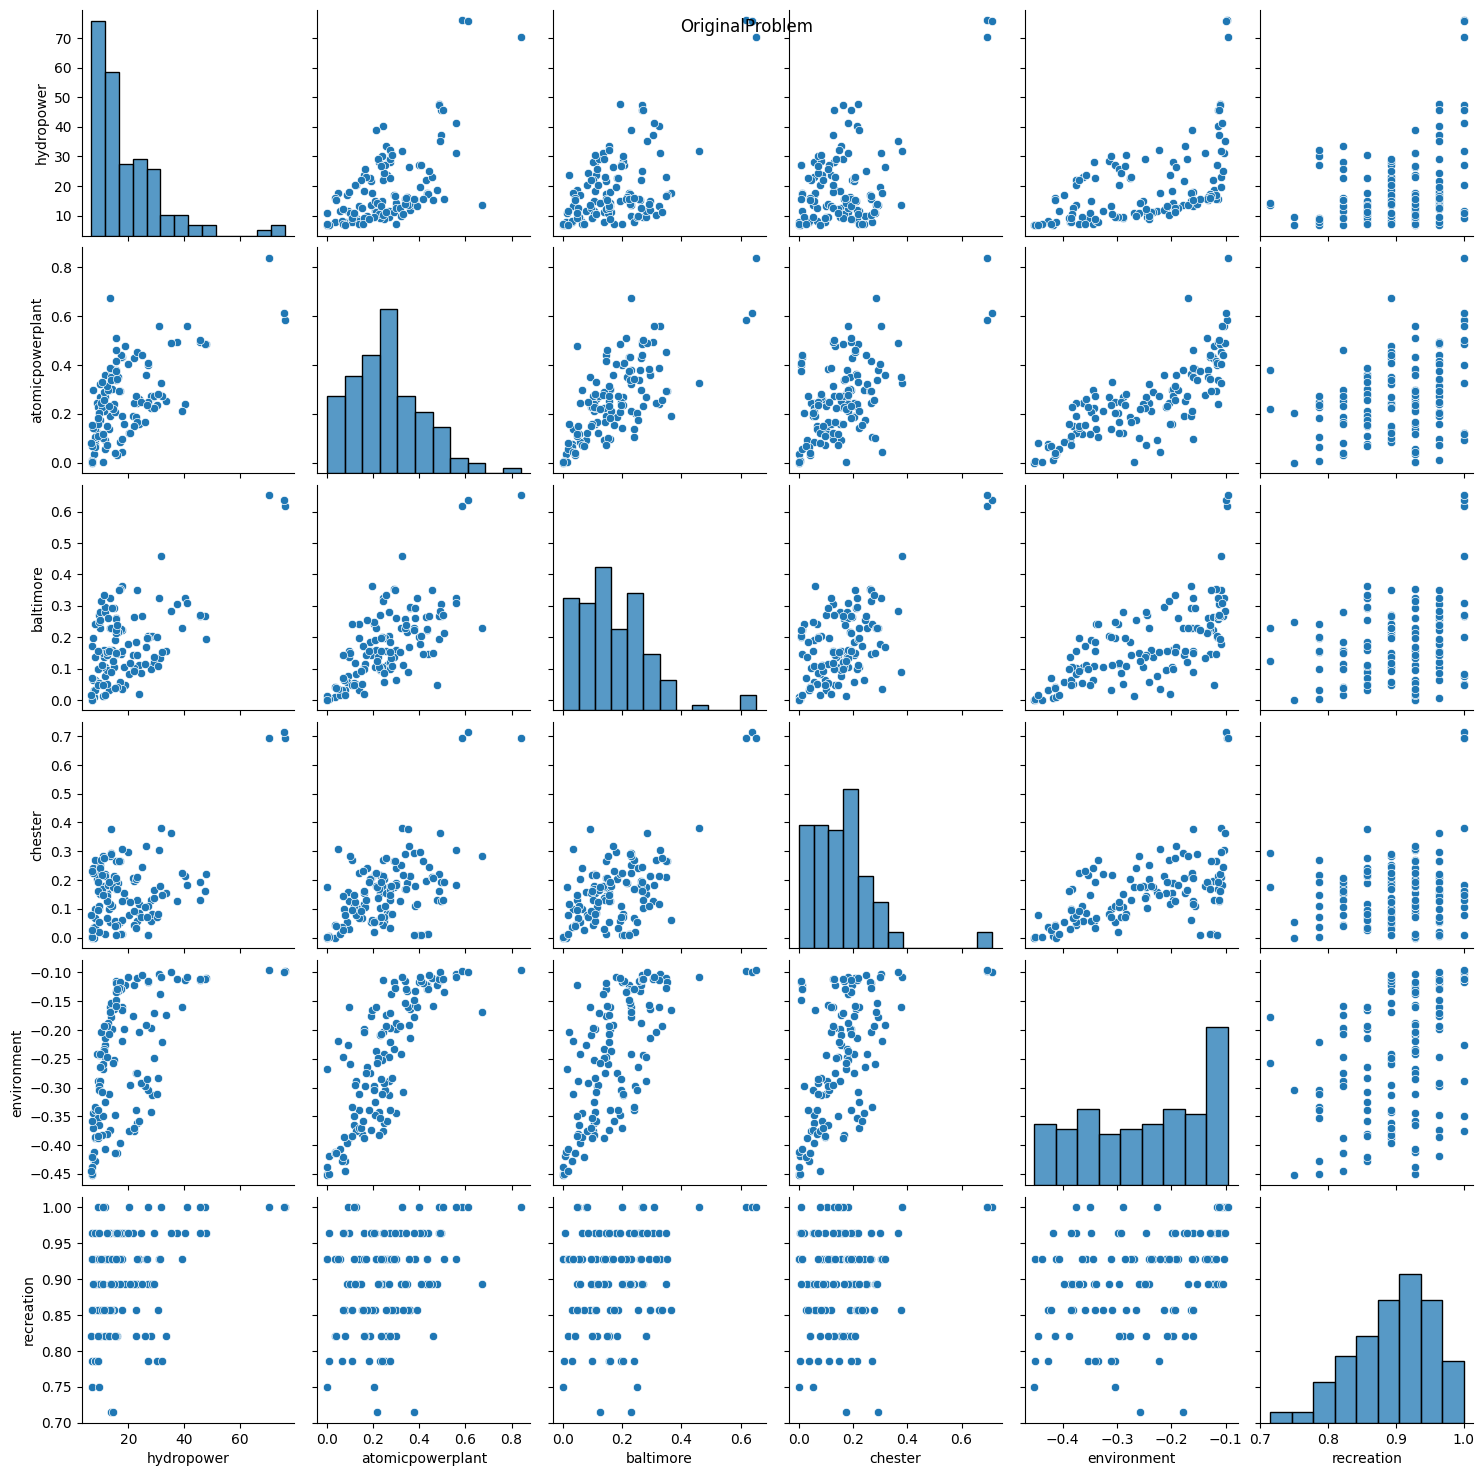

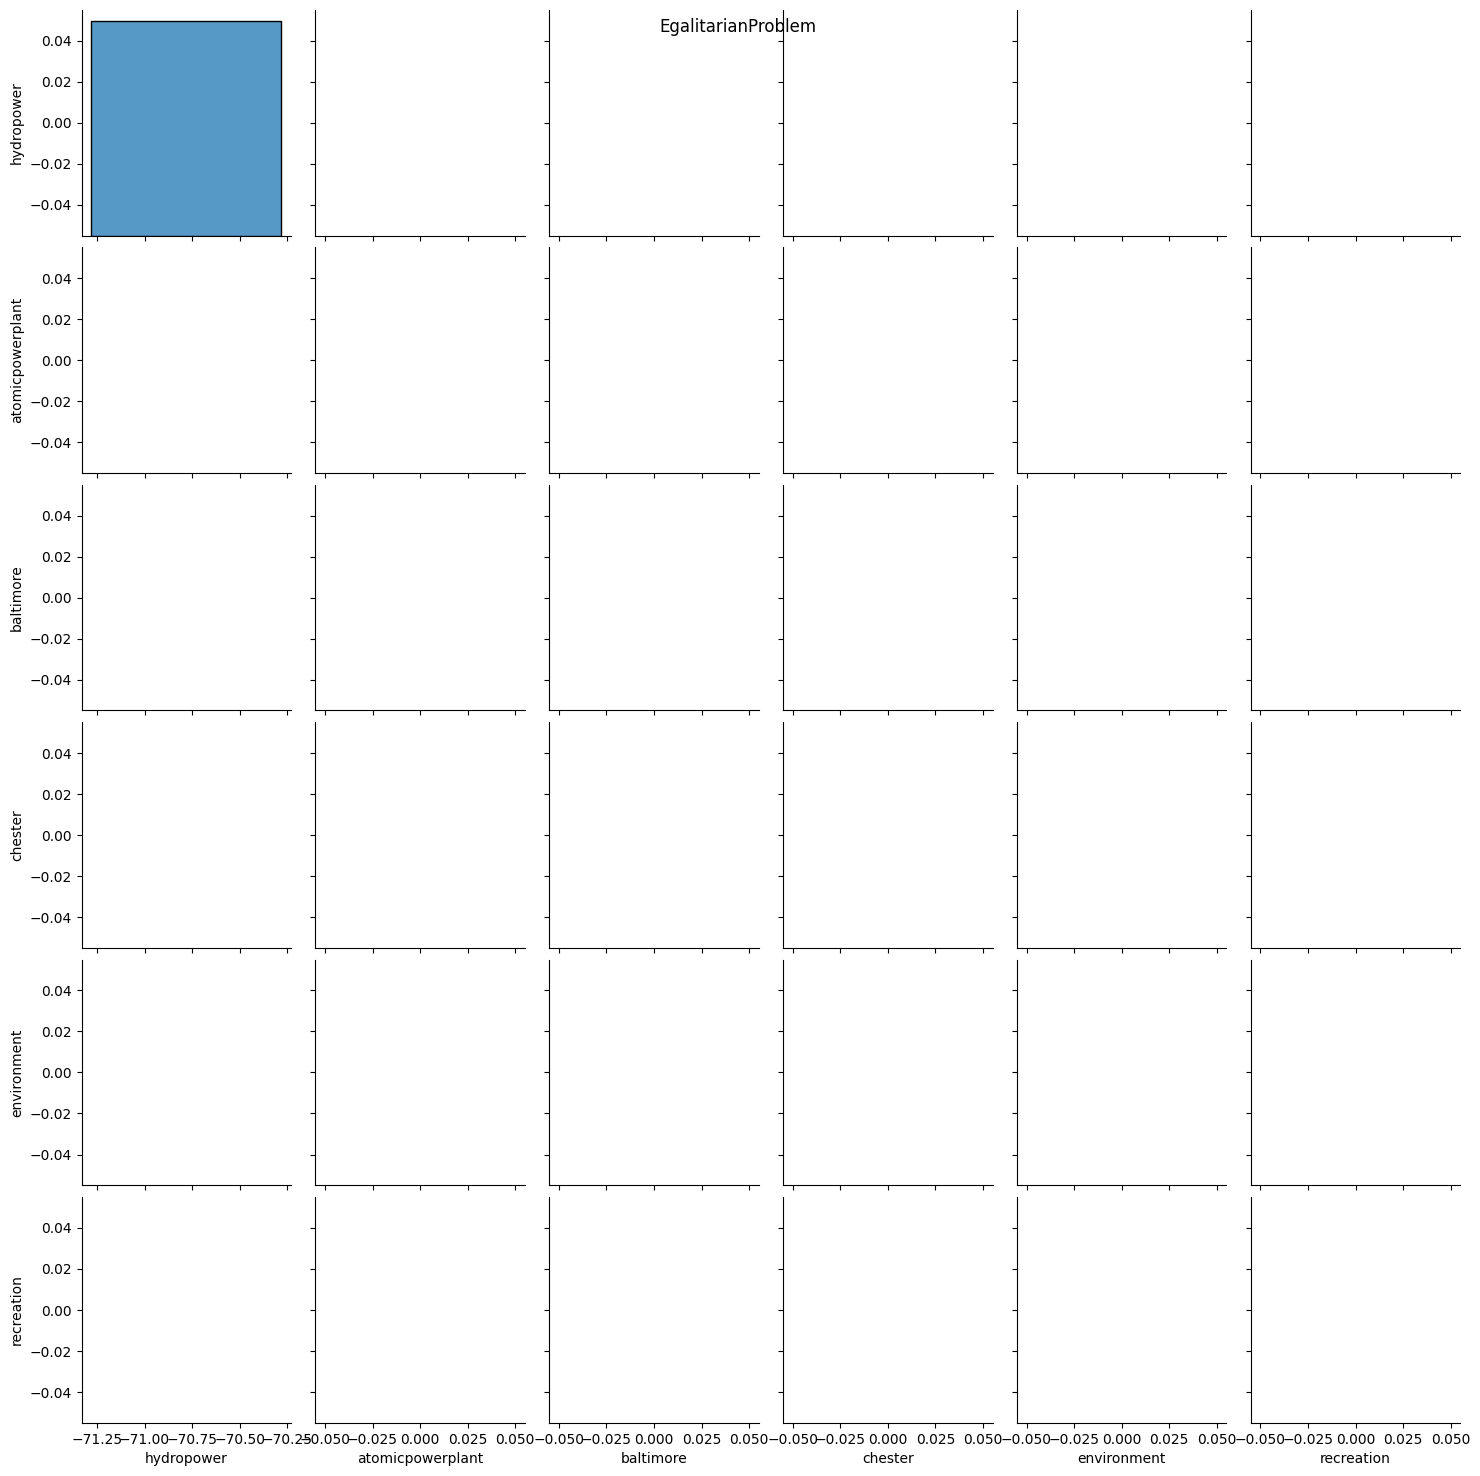

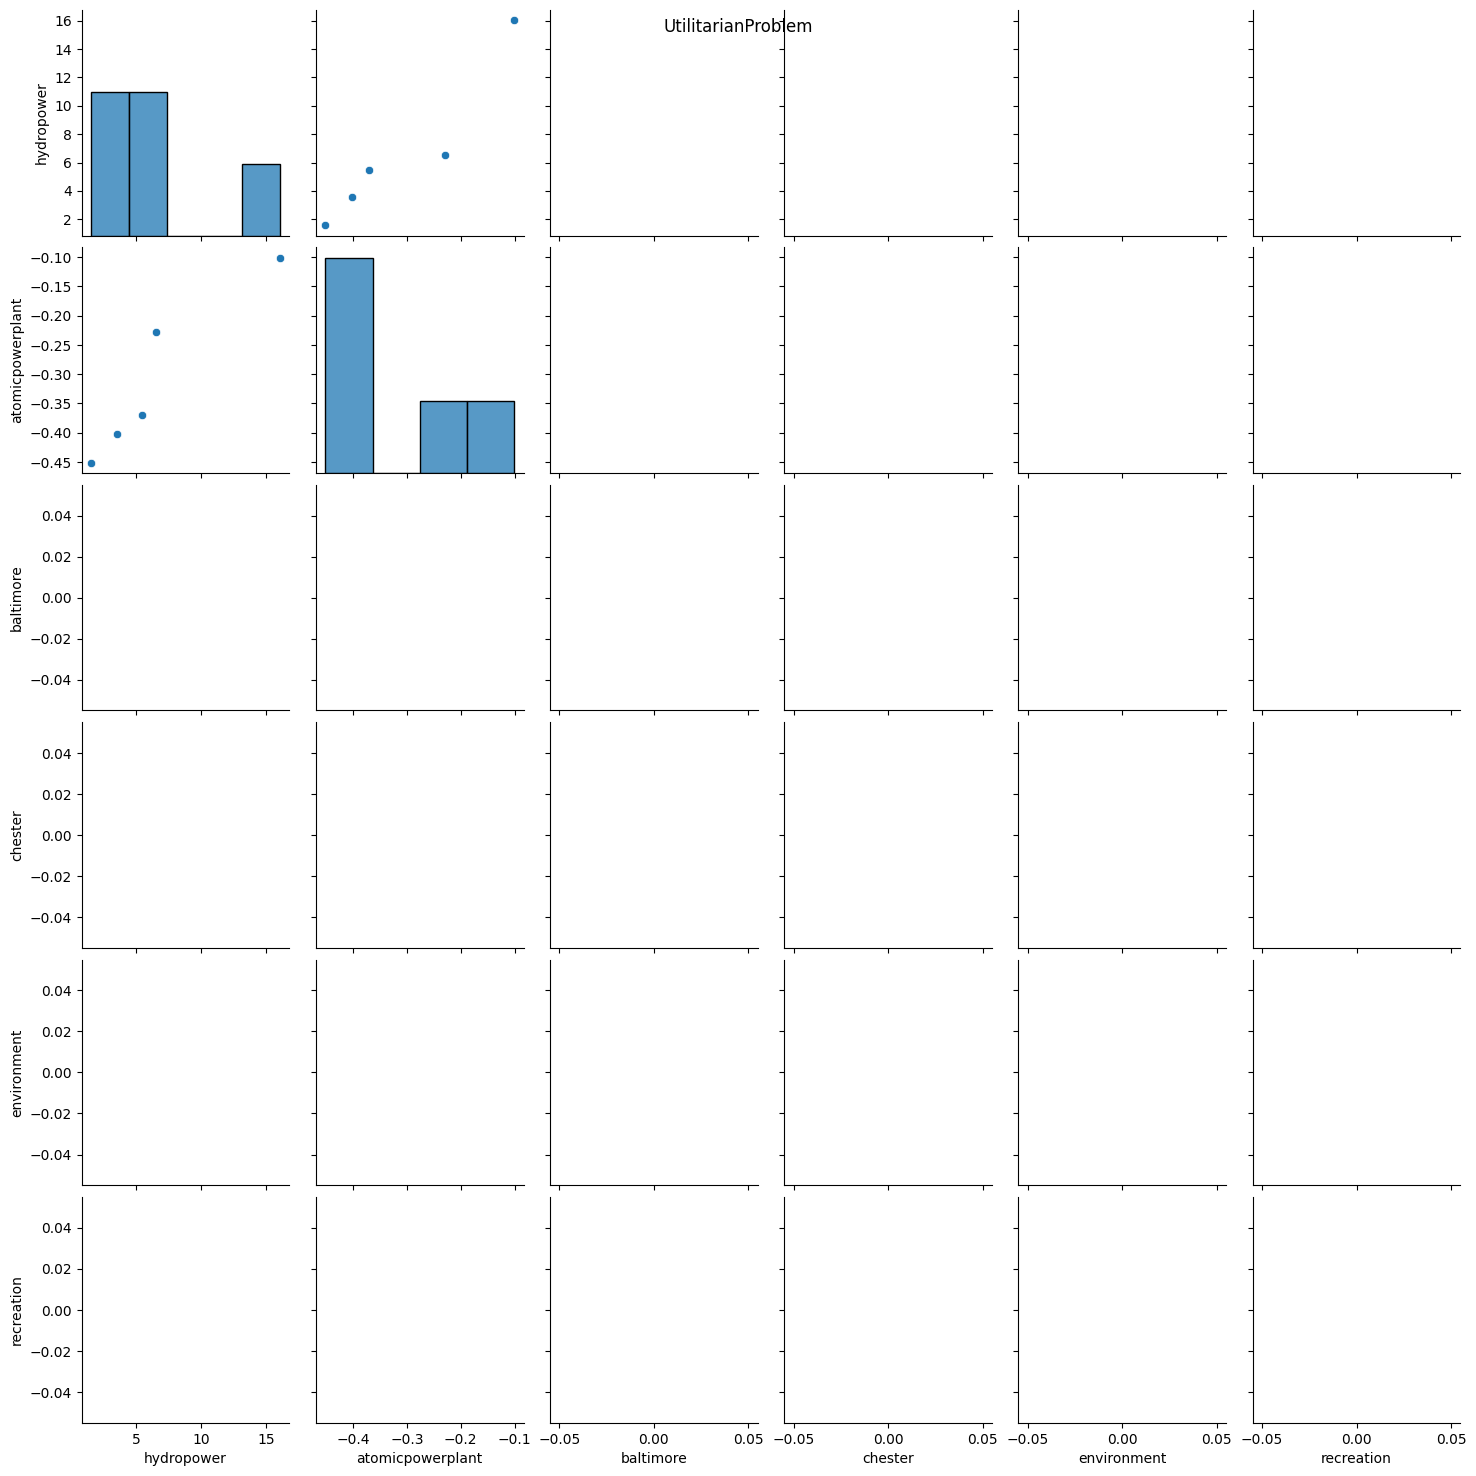

In [128]:
for i in pareto_sets:
    g = sns.pairplot(pareto_sets[i])
    g.fig.suptitle(i)
    plt.show()

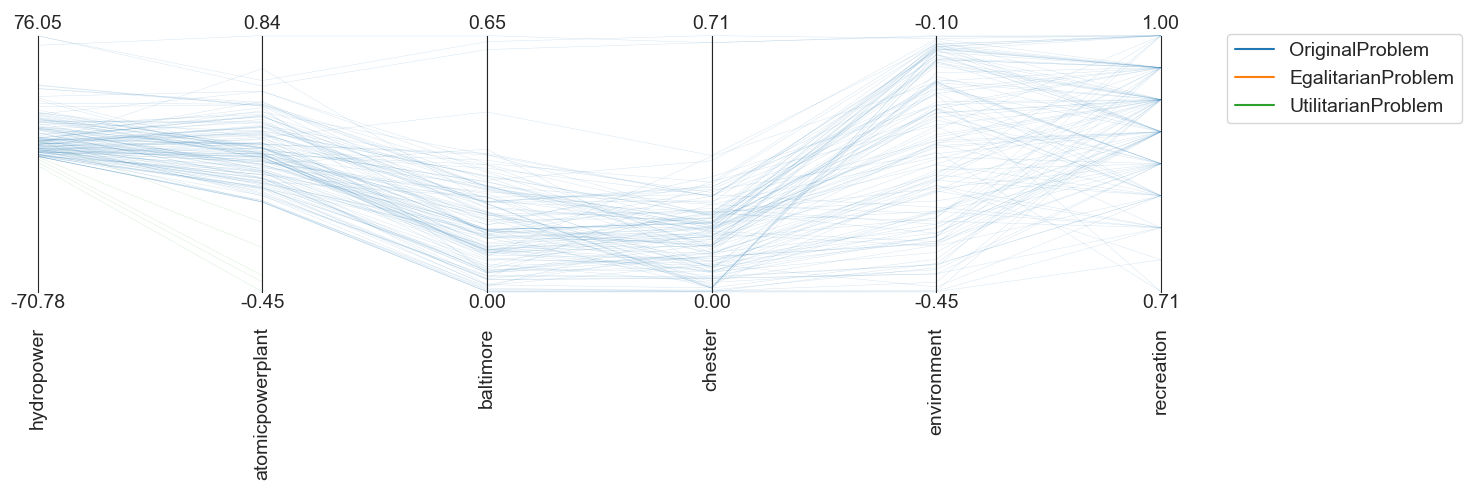

In [140]:
limits = get_limits(pd.concat(pareto_sets.values()))
# limits.loc[0] = [0,0,0,0,0,0]
# limits.loc[1] = [82,1,1,1,1,1]
axes = ParallelAxes(limits)

sns.color_palette()

for (k,v), c in zip(pareto_sets.items(), sns.color_palette()):
    axes.plot(v, label=k, lw=0.3, color=c, alpha=0.2)

axes.legend()

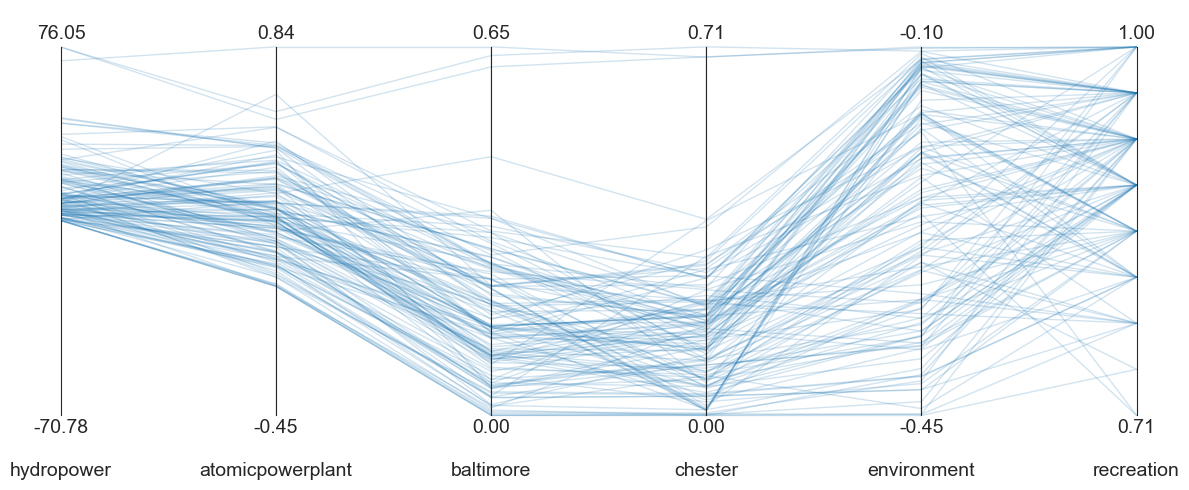

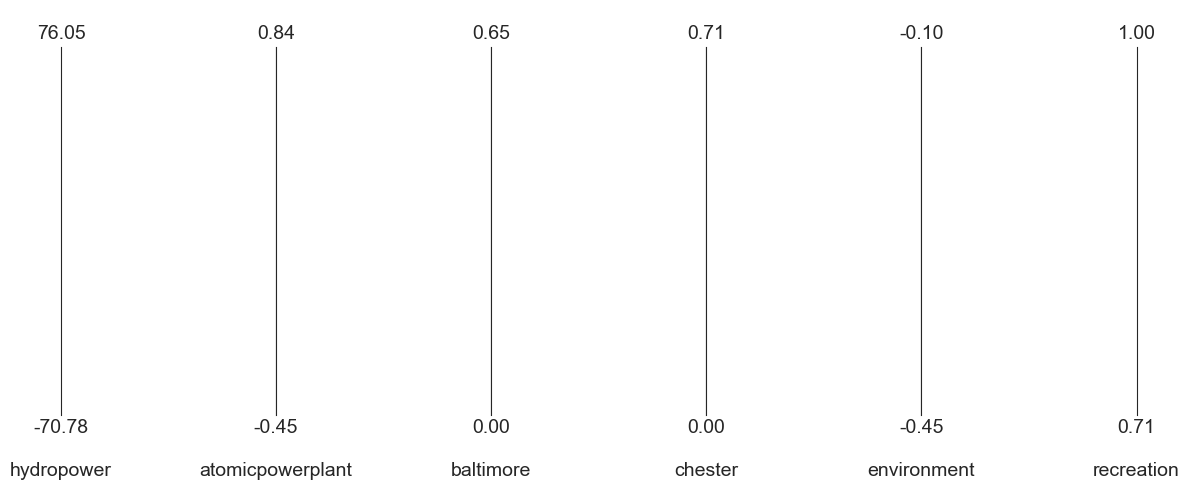

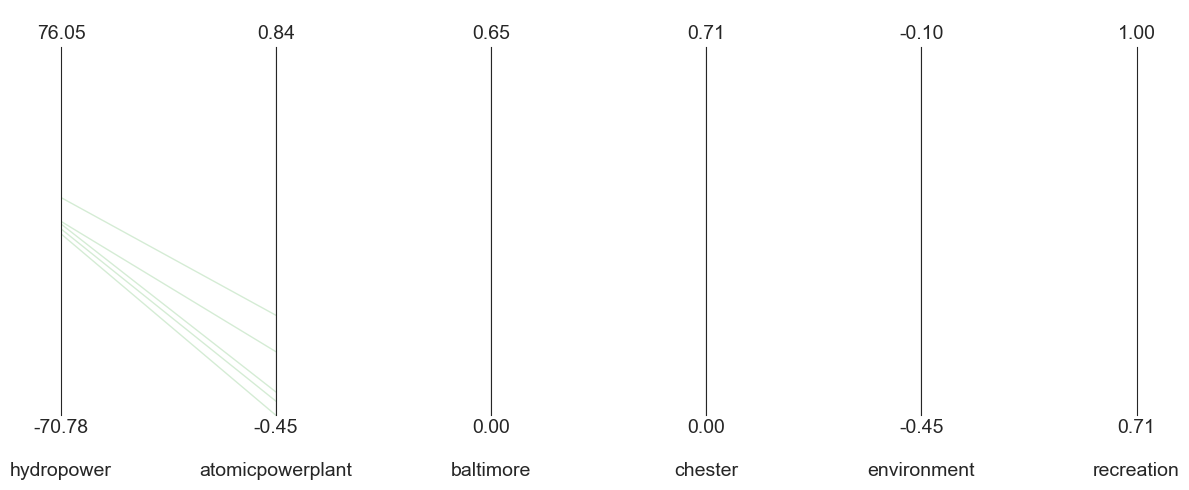

In [141]:
limits = get_limits(pd.concat(pareto_sets.values()))
# limits.loc[0] = [0,0,0,0,0,0]
# limits.loc[1] = [82,1,1,1,1,1]

for (k,v), c in zip(pareto_sets.items(), sns.color_palette()):
    axes = ParallelAxes(limits, rot=0)    
    axes.plot(v, label=k, lw=1, color=c, alpha=0.2)
#     axes.legend()
#     plt.savefig(f'./figs/{k}/{k}_parcoords_compare.png')
#     plt.savefig(f'./figs/{k}/{k}_parcoords_compare.pdf')

plt.show()

## Add ethical formulation as entry to the dataframe

In [163]:
# I am happy I learn this

for i,j in pareto_sets.items():
    j['problem'] = i
combined = pd.concat(pareto_sets.values())
combined

,hydropower,atomicpowerplant,baltimore,chester,environment,recreation,problem
0,6.845908,0.001318,4.470873e-04,0.000625,-0.450686,0.928571,OriginalProblem
1,17.596667,0.432927,2.239778e-01,0.011847,-0.122272,0.928571,OriginalProblem
2,6.895473,0.000002,9.909079e-07,0.000002,-0.452053,0.750000,OriginalProblem
3,9.544105,0.231168,2.715007e-01,0.102609,-0.244241,0.892857,OriginalProblem
4,23.121730,0.245844,1.045565e-01,0.056227,-0.362321,0.892857,OriginalProblem
...,...,...,...,...,...,...,...
0,5.504865,-0.369535,NaN,NaN,NaN,NaN,UtilitarianProblem
1,16.033977,-0.100899,NaN,NaN,NaN,NaN,UtilitarianProblem
2,6.540465,-0.228446,NaN,NaN,NaN,NaN,UtilitarianProblem
3,3.561572,-0.401629,NaN,NaN,NaN,NaN,UtilitarianProblem


## Boxplot analysis

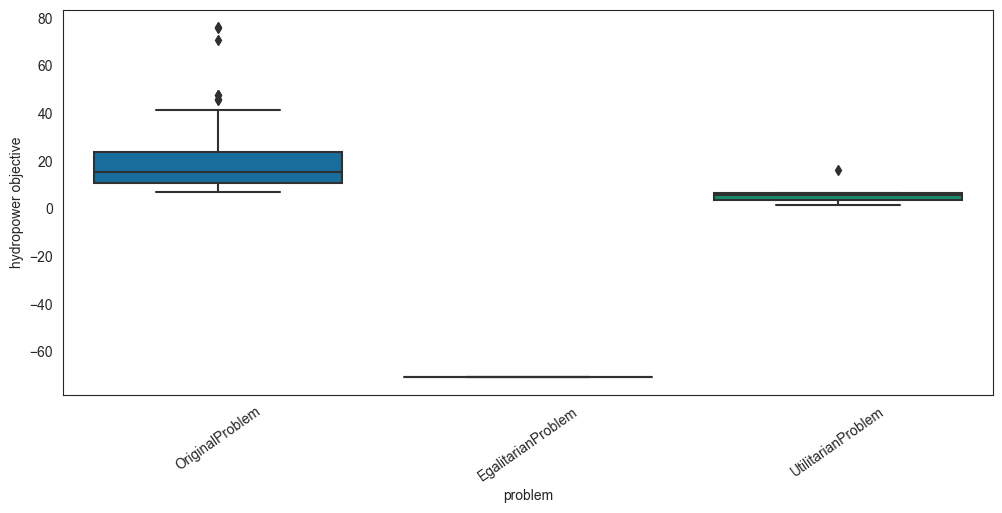

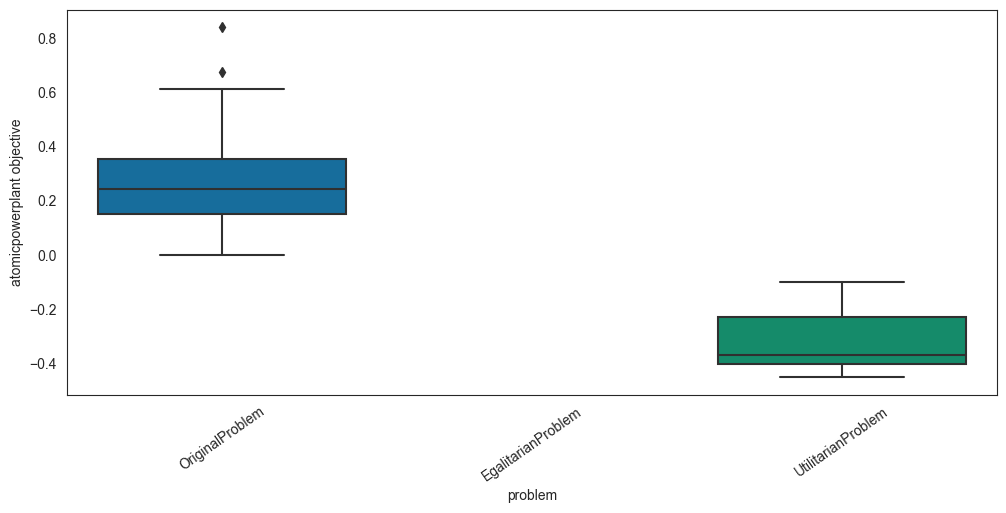

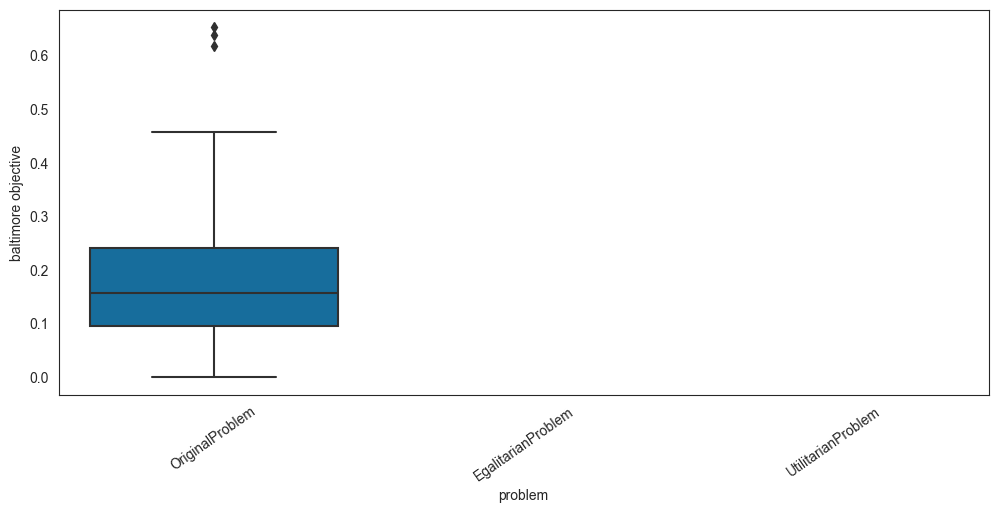

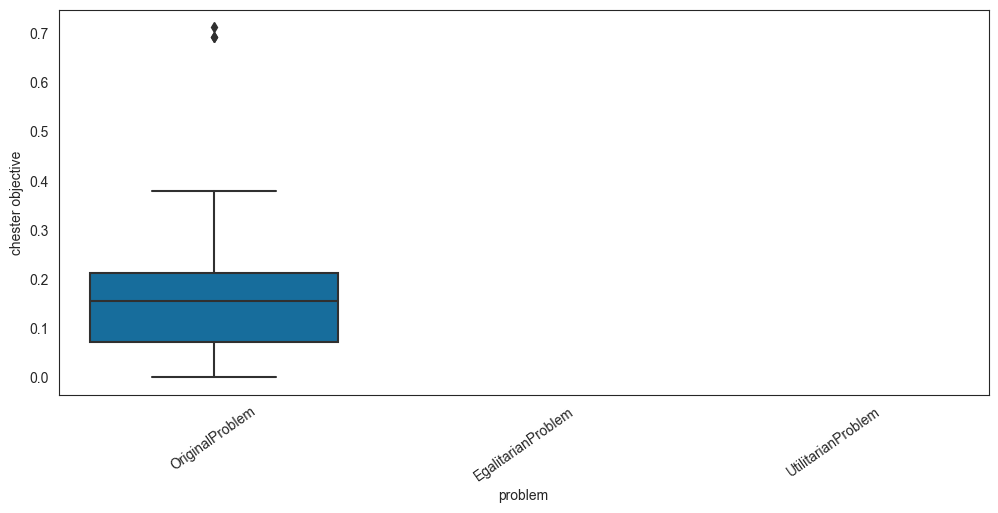

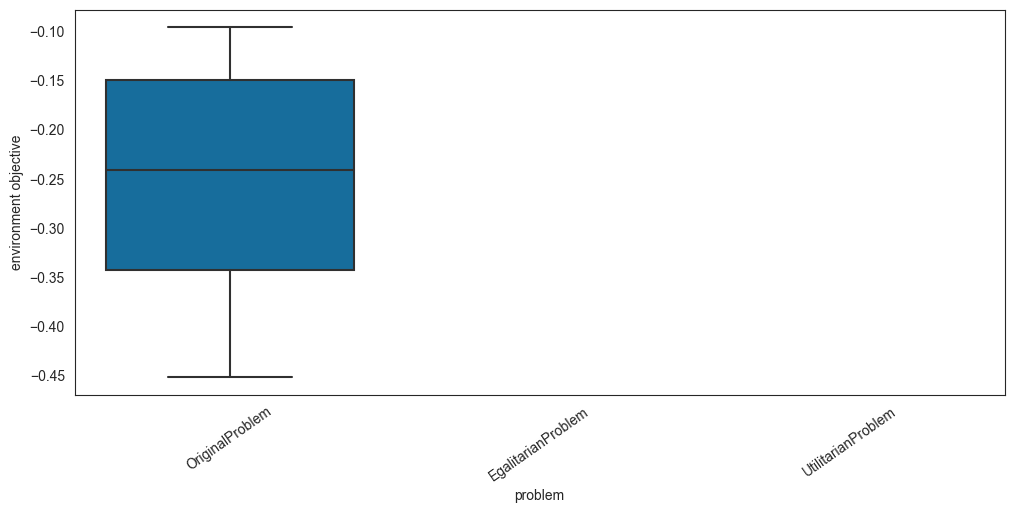

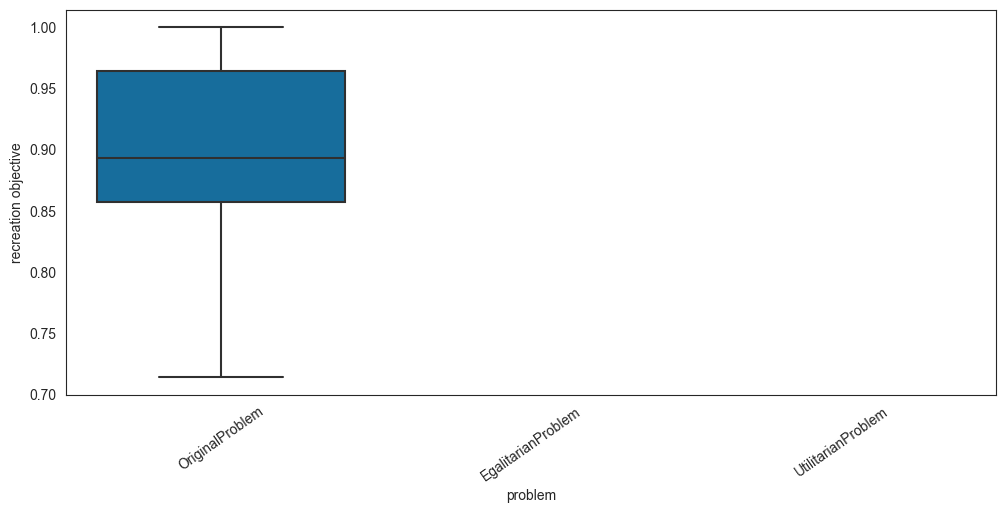

In [154]:
l=[]
for n in ethical_formulations:
    l.append(n.__name__)


for entry in combined.columns[0:-1]:
    data = combined[[entry, 'problem']]
    data
    sns.boxplot(data=data, y=entry,x='problem', order=l, palette = "colorblind")
    plt.ylabel(f"{entry} objective")
    plt.xticks(rotation=35)
    plt.show()

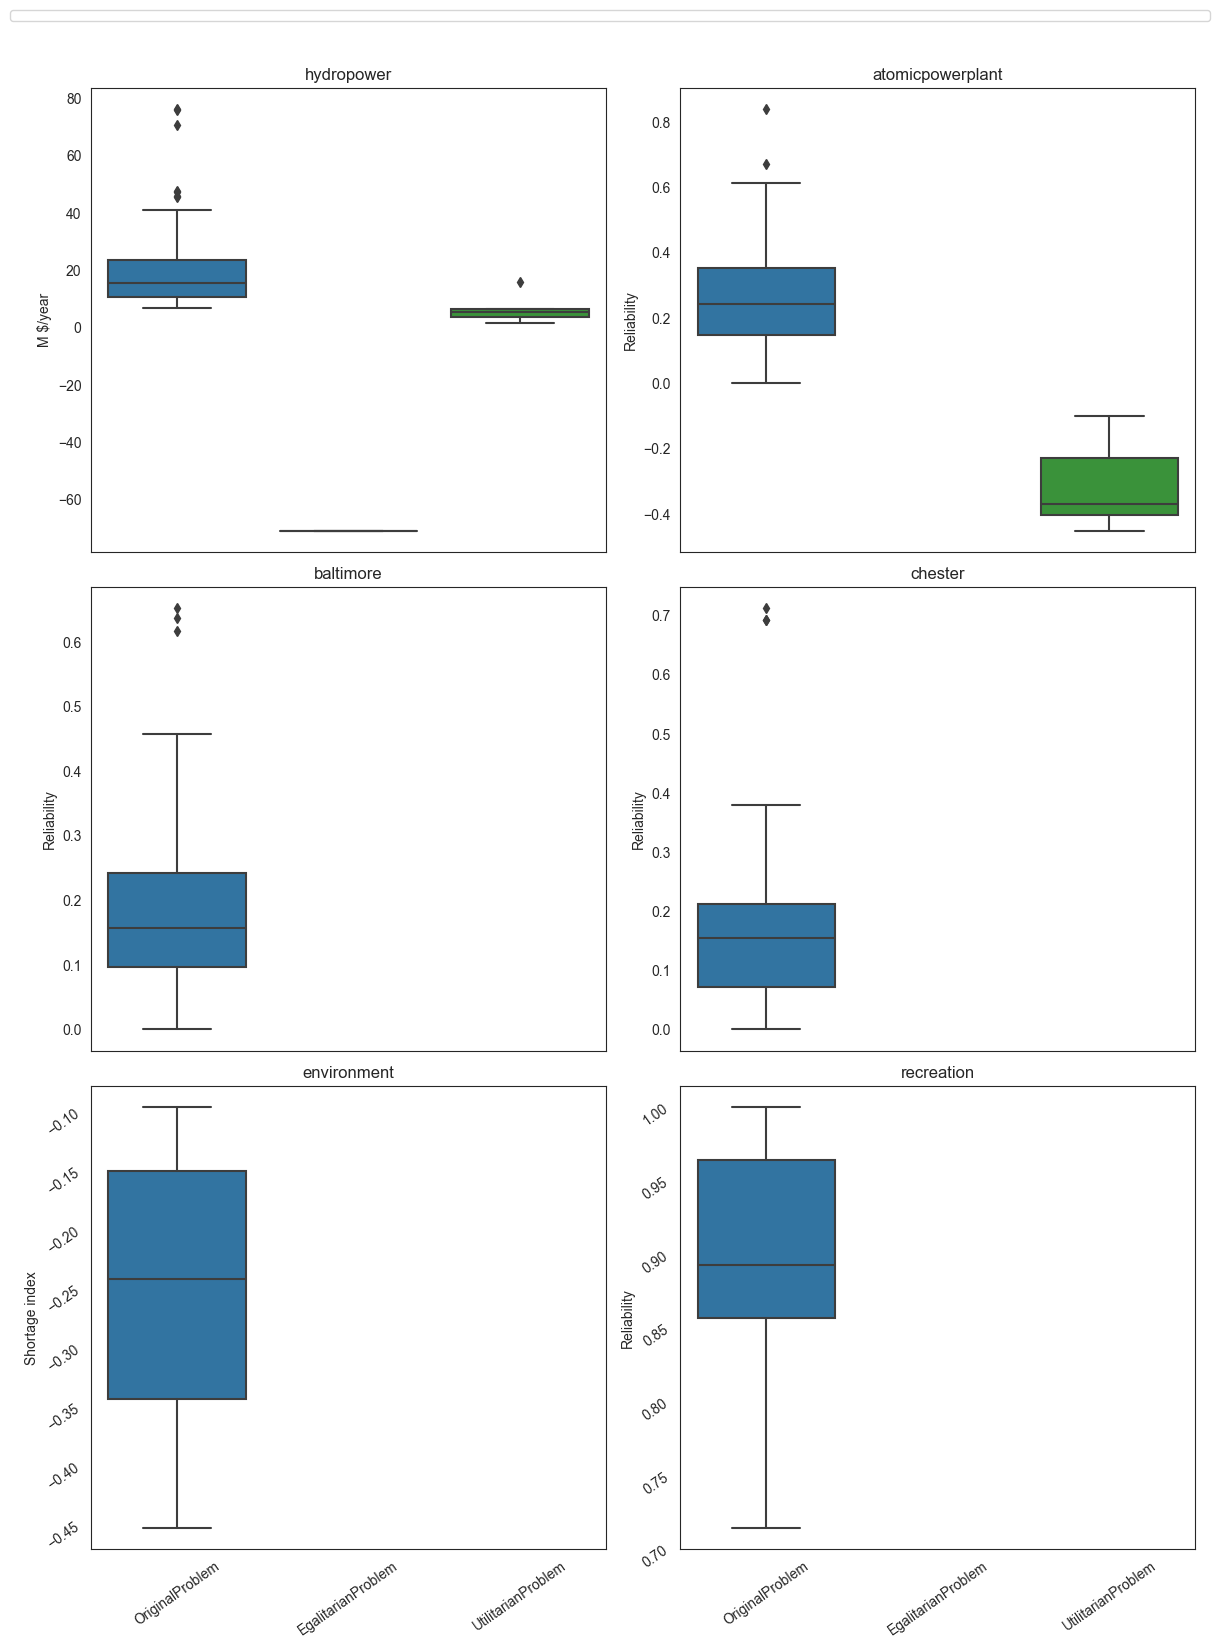

In [156]:
import matplotlib.patches as mpatches
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(12,16))

for i, entry in enumerate(combined.columns[0:-1]):
    x = i/2
    data = combined[[entry, 'problem']]
    if i%2:
        sns.boxplot(ax=axes[int(x),1], data=data, y=entry, x='problem', order=l)
        axes[int(x),1].set_title(entry)
        axes[int(x),1].set_ylabel("Reliability")
        axes[int(x),1].set_xlabel(None)
    else:
        sns.boxplot(ax=axes[int(x),0], data=data, y=entry, x='problem', order=l)
        axes[int(x),0].set_title(entry)
        axes[int(x),0].set_xlabel(None)
        if x == 0:
            axes[int(x),0].set_ylabel("M $/year")
        elif x == 2:
            axes[int(x),0].set_ylabel("Shortage index")
        else:
            axes[int(x),0].set_ylabel("Reliability")
    axes[2,0].tick_params(labelrotation=35)
    axes[2,1].tick_params(labelrotation=35)

# make a single figure level legend
handles = []
colors = sns.color_palette()

# for (i, problem) in enumerate(ethical_formulations):
#     # dirty hack to remove underscore from name of rbf
#     name = ' '.join(ethical_formulations.__name__.split('_')[0:-1])
#     patch = mpatches.Patch(color=colors[i], label=name)
#     handles.append(patch)

fig.legend(handles=handles, ncol=4, bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, )        
fig.tight_layout()
# plt.savefig(f'./figs/box_plots_compare.png', bbox_inches = 'tight')
# plt.savefig(f'./figs/box_plots_compare.pdf', bbox_inches = 'tight')

## Epsilon progress, Hypervolume

In [136]:
nfearchive = {}
for n in ethical_formulations:
    nfearchive[n.__name__] = {}
for entry in ethical_formulations:
    name = entry.__name__
    output_dir = f"../{output}/{name}/"
    for i in os.listdir(output_dir):
        if i.endswith("_hypervolume.csv"):
#             nfearchive[name][i.split("_")[0]] = pd.read_csv(output_dir + i)
            archives_by_nfe = pd.read_csv(output_dir + i)
            nfes = archives_by_nfe["Unnamed: 0"].values
            u_nfes = np.unique(nfes)
#             selected_nfe = u_nfes[-1::]
            selected_nfe = u_nfes[0::10]
            selected_nfe = np.append(selected_nfe, u_nfes[-1::])
            nfearchive[name][int(i.split("_")[0])] = archives_by_nfe.loc[archives_by_nfe['Unnamed: 0'].isin(selected_nfe)]

In [207]:
test_3 = pd.DataFrame.from_dict(nfearchive,
                               orient='index')
test_3 = test_3.reset_index()

,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5
0,100,0,9.541028,0.062257,0.001010,0.019680,-0.374813,0.857143
1,100,1,49.444486,0.364413,0.361492,0.402265,-0.091692,1.000000
2,100,2,13.867751,0.199380,0.091056,0.124541,-0.237102,0.821429
3,100,3,19.690831,0.317562,0.214591,0.175681,-0.106941,0.964286
4,100,4,24.317286,0.359883,0.405348,0.322423,-0.094896,0.928571
...,...,...,...,...,...,...,...,...
918,1000,132,8.763053,0.049725,0.107846,0.105426,-0.383505,0.892857
919,1000,133,9.471600,0.232634,0.095006,0.144073,-0.388384,0.928571
920,1000,134,26.664369,0.376931,0.243154,0.317239,-0.111500,0.928571
921,1000,135,15.867950,0.133250,0.079960,0.059859,-0.332857,0.857143


## Figuring out what this means

In [208]:
test_3.loc[0][70]



,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5
0,100,0,9.541028,0.062257,0.001010,0.019680,-0.374813,0.857143
1,100,1,49.444486,0.364413,0.361492,0.402265,-0.091692,1.000000
2,100,2,13.867751,0.199380,0.091056,0.124541,-0.237102,0.821429
3,100,3,19.690831,0.317562,0.214591,0.175681,-0.106941,0.964286
4,100,4,24.317286,0.359883,0.405348,0.322423,-0.094896,0.928571
...,...,...,...,...,...,...,...,...
918,1000,132,8.763053,0.049725,0.107846,0.105426,-0.383505,0.892857
919,1000,133,9.471600,0.232634,0.095006,0.144073,-0.388384,0.928571
920,1000,134,26.664369,0.376931,0.243154,0.317239,-0.111500,0.928571
921,1000,135,15.867950,0.133250,0.079960,0.059859,-0.332857,0.857143


## Unnamed: 0 is nfe
## Unnamed: 1 amount of runs?
## 0,1,2,3,4,5: ?

## What do you plot?

In [213]:
# problem = 'OriginalProblem'
# tempnfe = {}
# temphv = {}
# nfe_sets = {}
# hv_sets = {}
# # for problem in archives:
# nfe_sets[problem] = {}
# hv_sets[problem] = {}
# hv = Hypervolume(reference_set=pareto_sets[problem])

# # hv = Hypervolume(reference_set=ref_set) #global

# print(f"started {problem} at {DT.datetime.now().strftime('%H:%M:%S')}")

# # seedl = [10, 20, 30]
# for seed in archives[problem]:
#     nfe_sets[problem][seed] = {}
#     hv_sets[problem][seed] = {}
#     s_archives = archives[problem][seed]
#     nfes = []
#     hvs = []
#     for nfe, archive in s_archives.items():
#         nfes.append(nfe)
#         hvs.append(hv.calculate(archive))
#     nfe_sets[problem][seed] = nfes
#     hv_sets[problem][seed] = hvs
#     tempnfe[seed] = nfes
#     temphv[seed] = hvs
#     dfhv = pd.DataFrame.from_dict(temphv, orient='index')
#     dfnfe = pd.DataFrame.from_dict(tempnfe, orient='index')
#     dfhv = dfhv.T
#     dfnfe = dfnfe.T
# #     dfhv.to_csv(f"hv/{rbf}_hv.csv", index=False)
# #     dfnfe.to_csv(f"hv/{rbf}_nfe.csv", index=False)
# #     dfhv.to_csv(f"hv_global/{rbf}_hv_all.csv", index=False) #global
# #     dfnfe.to_csv(f"hv_global/{rbf}_nfe_all.csv", index=False) #global
#     print(f"finished seed: {seed} at {DT.datetime.now().strftime('%H:%M:%S')}")

In [214]:
# problem = 'OriginalProblem'

# fig, ax = plt.subplots(sharex=True)
# for i in nfe_sets_all:
#     ax.plot(nfe_sets_all[i], hv_sets_all[i])

# ax.set_xlabel('nfe')
# ax.set_ylabel('hypervolume')
# ax.set_title(rbf)
# sns.despine()

# plt.show()

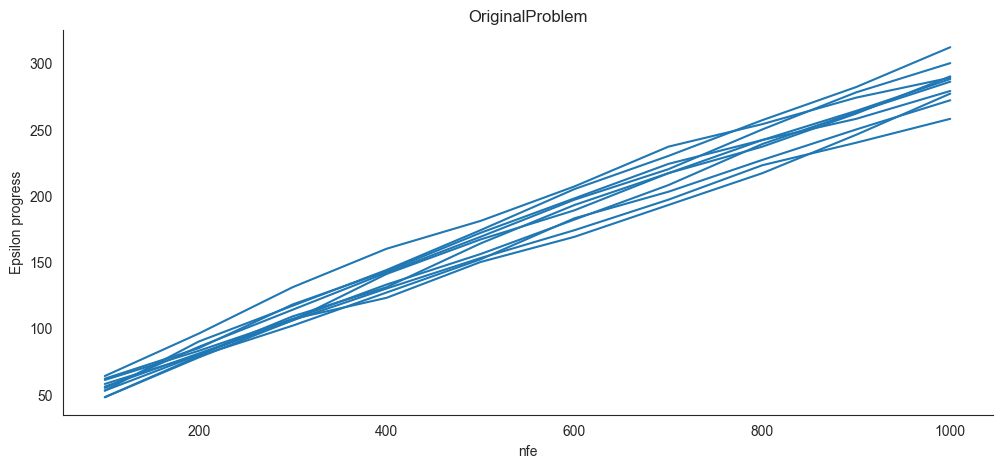

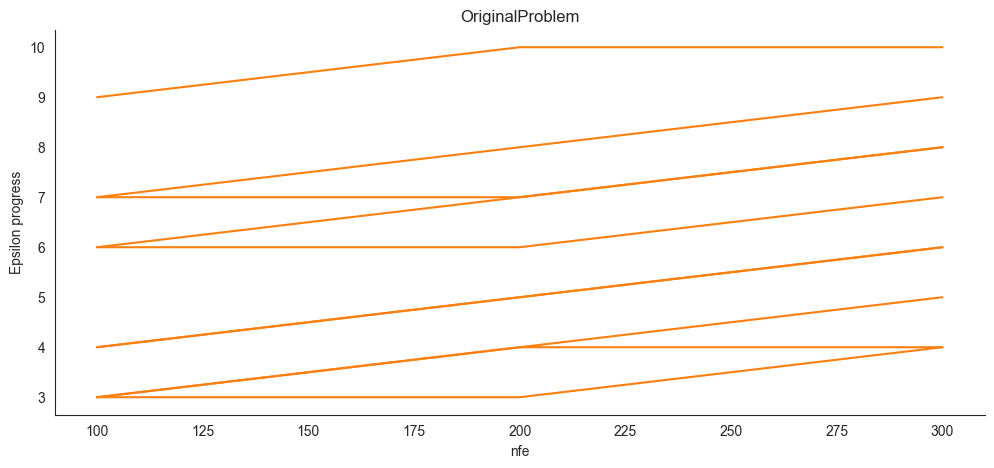

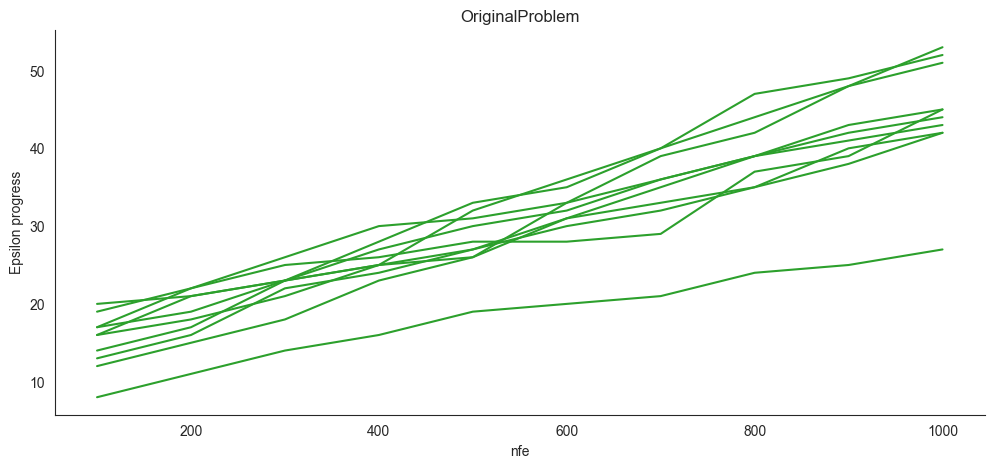

In [218]:
for entry, c in zip(ethical_formulations, sns.color_palette()):
    ethical_formulations = entry.__name__
    
    ep_nfe = {}
    ep_improv = {}
    output_dir = f"../{output}/{ethical_formulations}/"
    for i in os.listdir(output_dir):
        if i.endswith("_convergence.csv"):
            ep_load = pd.read_csv(output_dir + i)
            ep_nfe[int(i.split("_")[0])] = ep_load.nfe
            ep_improv[int(i.split("_")[0])]  = ep_load.improvements
    ep_nfe = pd.DataFrame.from_dict(ep_nfe)
    ep_improv = pd.DataFrame.from_dict(ep_improv)
    
    
    fig, ax = plt.subplots(sharex=True)
    ax.plot(ep_nfe, ep_improv, color=c)

    ax.set_xlabel('nfe')
    ax.set_ylabel('Epsilon progress')
    ax.set_title(problem)
    sns.despine()
#     plt.savefig(f'figs/{rbf}/{rbf}_epsprog.jpg')
plt.show()

## Irrelevant, only in case you want to inspect releases

In [246]:
# pareto_sets = {}
# for entry in rbfs:
#     name = entry.__name__
#     output_dir = f"../refsets/"
#     results = pd.read_csv(output_dir + name+ '_refset.csv')
#     pareto_sets[name] = results

refset = {}
varset = {}

for entry in ethical_formulations:
    name = entry.__name__
    # load variables
    output_dir = os.path.abspath(f'../{output}/{name}/')
    for filename in os.listdir(output_dir):
        if filename.endswith('_variables.csv'):
            df_vars = pd.read_csv(f"{output_dir}/{filename}",header=None)
            columnname = ["c1","r1","c2","r2","c3","r3","c4","r4","c5","r5","c6","r6","c7","r7","c8","r8","w1","w2","w3","w4","w5","w6","w7","w8","w9","w10","w11","w12","w13","w14","w15","w16"]
            df_vars.columns = columnname
# #         elif filename == f'{name}_.csv':
# #             df_refs = pd.read_csv(f"{output_dir}/{filename}")
# #             refset[name] = df_refs
        else:
            continue
        varset[name] = df_vars

{'OriginalProblem':           c1        r1        c2        r2        c3        r3        c4  \
 0  -0.017878  0.459478  0.073546  0.343344 -0.655615  0.419929 -0.489069   
 1  -0.870448  0.683982 -0.563583  0.868781 -0.656450  0.636522 -0.932068   
 2   0.765889  0.485998 -0.915303  0.464607 -0.994645  0.204872  0.026854   
 3  -0.386230  0.670090  0.017403  0.291723 -0.731535  0.971336 -0.172154   
 4  -0.910365  0.351799 -0.079021  0.183675 -0.024034  0.264009  0.110393   
 ..       ...       ...       ...       ...       ...       ...       ...   
 91 -0.910365  0.355543 -0.079021  0.182150 -0.024034  0.198296  0.110393   
 92 -0.336628  0.163291 -0.883684  0.906009 -0.109477  0.323152 -0.603419   
 93  0.765396  0.684642 -0.872509  0.269610  0.214650  0.221698 -0.525563   
 94  0.768279  0.502752 -0.872509  0.278568  0.223803  0.211916  0.989960   
 95 -0.561321  0.116393 -0.221138  0.025001 -0.196965  0.268562  0.964881   
 
           r4        c5        r5  ...        w7       

In [232]:
## combined graph if you want